# Setting up the environment

In [314]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline

In [253]:
input_train_file = r'./input/train.csv'
input_test_file = r'./input/test.csv'
output_file = r'./output/submission.csv'

In [3]:
# Import data
df_train = pd.read_csv(input_train_file).set_index('Id')
df_test = pd.read_csv(input_test_file).set_index('Id')

df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Split data into X and Y
df_train_x = df_train.drop('SalePrice', axis=1)
df_train_y = df_train.SalePrice

df_test_x = df_test

In [5]:
# Create useful variables
n_train = df_train_x.shape[0]
n_test = df_test_x.shape[0]

columns_to_drop = set()

In [6]:
df_all = pd.concat([df_train_x, df_test_x])
df_all.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


# Preliminary analysis

In [7]:
# Show columns which have empty values

def show_null_columns():
	print(df_all.loc[:, df_all.isnull().any()].isnull().sum())

show_null_columns()

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64


In [8]:
# Drop columns which have too many missing values
columns_to_drop.update(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])

In [9]:
# How many examples have Exterior1st and Exterior2nd as the same covering
df_all[df_all.Exterior1st == df_all.Exterior2nd].Exterior1st.count()

2481

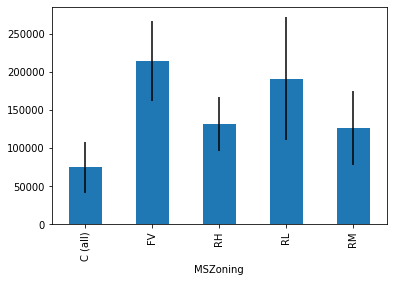

In [10]:
# Impact of MSZoning on SalePrice
df_train.groupby(['MSZoning']).agg([np.mean, np.std])['SalePrice'].plot(kind='bar', y='mean', yerr='std', legend=False)
plt.show()

# Imputing missing values

In [11]:
# Identify MSZoning trends; 4 missing values
print(df_all.MSZoning.value_counts(), '\n\n')
print(df_train_x.MSZoning.value_counts())

df_all.MSZoning.fillna('RL', inplace=True)

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64 


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


In [12]:
# Identify Utilities trends; 2 missing values
print(df_all.Utilities.value_counts(), '\n\n')
print(df_train_x.Utilities.value_counts())

df_all.Utilities.fillna('AllPub', inplace=True)

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64 


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


In [13]:
# Identify Exterior1st and Exterior2nd trends; 1 missing value each
print(pd.concat([df_all.Exterior1st.value_counts(), df_all.Exterior2nd.value_counts()], axis=1), '\n\n')
print(pd.concat([df_train_x.Exterior1st.value_counts(), df_train_x.Exterior2nd.value_counts()], axis=1))

df_all[df_all.Exterior1st.isnull() | df_all.Exterior2nd.isnull()]

df_all.Exterior1st.fillna('VinylSd', inplace=True)
df_all.Exterior2nd.fillna('VinylSd', inplace=True)

         Exterior1st  Exterior2nd
VinylSd       1025.0       1014.0
MetalSd        450.0        447.0
HdBoard        442.0        406.0
Wd Sdng        411.0        391.0
Plywood        221.0        270.0
CemntBd        126.0          NaN
BrkFace         87.0         47.0
WdShing         56.0          NaN
AsbShng         44.0         38.0
Stucco          43.0         47.0
BrkComm          6.0          NaN
Stone            2.0          6.0
AsphShn          2.0          4.0
CBlock           2.0          3.0
ImStucc          1.0         15.0
CmentBd          NaN        126.0
Wd Shng          NaN         81.0
Brk Cmn          NaN         22.0
Other            NaN          1.0 


         Exterior1st  Exterior2nd
VinylSd        515.0        504.0
HdBoard        222.0        207.0
MetalSd        220.0        214.0
Wd Sdng        206.0        197.0
Plywood        108.0        142.0
CemntBd         61.0          NaN
BrkFace         50.0         25.0
WdShing         26.0          NaN
Stucco     

In [14]:
# Deal with missing basement data

bsmt_filter_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure']

bsmt_show_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']

df_train_x[bsmt_show_columns].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
BsmtQual,1.000000,0.264417,0.008279,0.268420,0.045718,0.076612,0.045701,0.085599,0.060949,-0.027827,0.044341
BsmtCond,0.264417,1.000000,0.053474,0.195419,0.009381,0.076670,0.002121,0.080564,0.052768,0.007489,0.057140
BsmtExposure,0.008279,0.053474,1.000000,-0.130311,0.129656,0.071462,0.025180,0.071600,0.115216,-0.208097,0.042747
BsmtFinType1,0.268420,0.195419,-0.130311,1.000000,-0.021259,0.220908,0.165484,0.067085,-0.030666,0.214494,0.033099
BsmtFinSF1,0.045718,0.009381,0.129656,-0.021259,1.000000,0.198789,0.255443,0.202353,0.273626,-0.359580,0.048863
BsmtFinType2,0.076612,0.076670,0.071462,0.220908,0.198789,1.000000,0.786582,-0.047266,0.046669,-0.153305,0.119048
BsmtFinSF2,0.045701,0.002121,0.025180,0.165484,0.255443,0.786582,1.000000,-0.015280,0.101335,-0.111418,0.053291
BsmtUnfSF,0.085599,0.080564,0.071600,0.067085,0.202353,-0.047266,-0.015280,1.000000,0.444640,0.033466,-0.014895
TotalBsmtSF,0.060949,0.052768,0.115216,-0.030666,0.273626,0.046669,0.101335,0.444640,1.000000,-0.067083,-0.019705
BsmtFullBath,-0.027827,0.007489,-0.208097,0.214494,-0.359580,-0.153305,-0.111418,0.033466,-0.067083,1.000000,0.133525


In [15]:
display(df_all.loc[df_all[bsmt_filter_columns].isnull().all(axis=1), bsmt_show_columns].describe())
# All rows with missing BsmtQual, BsmtCond, BsmtExposure have 0 basement surface area

df_all.update(df_all.loc[df_all[bsmt_filter_columns].isnull().all(axis=1), ['BsmtFinType1', 'BsmtFinType2']].fillna('NA'))
df_all.update(df_all.loc[df_all[bsmt_filter_columns].isnull().all(axis=1), ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']].fillna(0))
df_all.update(df_all.loc[df_all[bsmt_filter_columns].isnull().all(axis=1), bsmt_filter_columns].fillna('NA'))

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
count,78.0,78.0,78.0,78.0,77.0,77.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Check if any missing values left
show_null_columns()

LotFrontage      486
Alley           2721
MasVnrType        24
MasVnrArea        23
BsmtQual           2
BsmtCond           3
BsmtExposure       3
BsmtFinType2       1
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64


In [17]:
# Handful of basement data to be filled

display(df_all.loc[df_all.BsmtQual.isnull(), bsmt_show_columns])
display(df_train_x.BsmtQual.value_counts())
df_all.BsmtQual.fillna('TA', inplace=True)

display(df_all.loc[df_all.BsmtCond.isnull(), bsmt_show_columns])
display(df_train_x.BsmtCond.value_counts())
df_all.BsmtCond.fillna('TA', inplace=True)

display(df_all.loc[df_all.BsmtExposure.isnull(), bsmt_show_columns])
display(df_train_x.BsmtExposure.value_counts())
df_all.BsmtExposure.fillna('No', inplace=True)

display(df_all.loc[df_all.BsmtFinType2.isnull(), bsmt_show_columns])
display(df_train_x[['BsmtFinType1', 'BsmtFinSF1']].groupby('BsmtFinType1').describe())
df_all.BsmtFinType2.fillna('Rec', inplace=True)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
2218,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,0.0,0.0
2219,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,0.0,0.0


TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
2041,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,1.0,0.0
2186,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,0.0,1.0
2525,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0,0.0,0.0


TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
949,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0
1488,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
2349,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0


No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
333,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0


BsmtFinSF1                                                \
                  count        mean         std    min     25%    50%   
BsmtFinType1                                                            
ALQ               220.0  619.863636  320.433310   20.0  383.25  593.5   
BLQ               148.0  536.668919  270.945193   25.0  349.50  516.5   
GLQ               418.0  801.729665  490.888087    2.0  517.00  739.5   
LwQ                74.0  379.540541  269.696236   16.0  187.00  318.0   
Rec               133.0  516.601504  272.460866  129.0  312.00  456.0   
Unf               430.0    0.000000    0.000000    0.0    0.00    0.0   

                               
                  75%     max  
BsmtFinType1                   
ALQ            788.25  1880.0  
BLQ            675.00  1277.0  
GLQ           1081.25  5644.0  
LwQ            503.00  1237.0  
Rec            637.00  1332.0  
Unf              0.00     0.0

In [18]:
del bsmt_show_columns
del bsmt_filter_columns

In [19]:
# Identify Electrical trends; 1 missing value
print(df_all.Electrical.value_counts(), '\n\n')
print(df_train_x.Electrical.value_counts())

df_all.Electrical.fillna('SBrkr', inplace=True)

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64 


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [20]:
# Identify KitchenQual trends; 1 missing value
print(df_all.KitchenQual.value_counts(), '\n\n')
print(df_train_x.KitchenQual.value_counts())

df_all.KitchenQual.fillna('TA', inplace=True)

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64 


TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


In [21]:
# Identify Functional trends; 1 missing value
print(df_all.Functional.value_counts(), '\n\n')
print(df_train_x.Functional.value_counts())

df_all.Functional.fillna('Typ', inplace=True)

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64 


Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


In [22]:
# Identify SaleType trends; 1 missing value
print(df_all.SaleType.value_counts(), '\n\n')
print(df_train_x.SaleType.value_counts())

df_all.SaleType.fillna('WD', inplace=True)

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64 


WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


In [23]:
# Ignoring all other columns for now
columns_to_drop.update(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'MiscFeature'])

In [24]:
# Check if any missing values left
show_null_columns()

LotFrontage      486
Alley           2721
MasVnrType        24
MasVnrArea        23
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
dtype: int64


# Performing regression

In [25]:
df_all.drop(columns_to_drop, axis=1, inplace=True)

In [292]:
df_all_one_hot = pd.get_dummies(df_all)
df_all_one_hot.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,10168.114080,6.089072,5.564577,1971.312778,1984.264474,441.272011,49.565262,560.579993,1051.417266,...,0.002741,0.081877,0.002398,0.865365,0.065091,0.004111,0.008222,0.015759,0.822885,0.083933
std,42.517628,7886.996359,1.409947,1.113131,30.291442,20.894344,455.606014,169.179104,439.590889,441.120498,...,0.052289,0.274225,0.048920,0.341392,0.246728,0.063996,0.090317,0.124562,0.381832,0.277335
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,220.000000,793.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,368.000000,0.000000,467.000000,989.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,733.000000,0.000000,805.000000,1302.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1526.000000,2336.000000,6110.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [302]:
train_x = df_all_one_hot.iloc[:n_train, :]
train_y = df_train_y

test_x = df_all_one_hot.iloc[-n_test:, :]

In [303]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [304]:
%%time

model = LinearRegression()
model.fit(train_x, train_y)

Wall time: 106 ms


LinearRegression()

In [308]:
def get_cost(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

print(f'Loss Train: {round(get_cost(train_y, model.predict(train_x)), 8)}')

Loss Train: 0.11620038


In [347]:
model.coef_

array([-2.57991075e+01,  7.66910899e-01,  7.18066917e+03,  5.66525258e+03,
        3.47799120e+02,  8.83216748e+01, -1.61576038e+13, -1.61576038e+13,
       -1.61576038e+13,  1.61576038e+13, -8.68239575e+12, -8.68239575e+12,
       -8.68239575e+12,  8.68239575e+12,  5.75423557e+02, -9.86455967e+02,
        3.11303279e+03,  8.84481583e+02, -4.33425485e+03, -1.40707331e+04,
        1.42955980e+03,  2.76878969e+03,  1.18581296e+01,  1.99230545e-02,
        4.45897729e+00,  2.78903903e+01,  3.91065248e+01,  7.45256959e+01,
       -6.33261032e-01, -4.86772064e+02, -3.43439470e+02,  7.73797627e+10,
        7.73797883e+10,  7.73797824e+10,  7.73797841e+10,  7.73797812e+10,
        7.01158663e+09,  7.01161947e+09, -1.08819400e+11, -1.08819393e+11,
       -1.08819395e+11, -1.08819398e+11,  3.21293610e+09,  3.21294555e+09,
        3.21292560e+09,  3.21294180e+09, -1.03687979e+09, -1.03689876e+09,
       -3.17367108e+10, -3.17367037e+10, -3.17367188e+10, -3.17367279e+10,
       -3.17367127e+10,  

In [307]:
test_y_pred = model.predict(test_x)
test_y_pred

array([110747.35838318, 160064.20146179, 185907.21949768, ...,
       165058.55509949, 112564.48591614, 218322.07112122])

In [299]:
out = pd.DataFrame({'Id': df_test_x.axes[0], 'SalePrice': test_y_pred.squeeze()})
out.to_csv(output_file, index=False)